
*check if there are highly correlated features and drop them if there are any.
One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. (  Hint: check Dropfirst option).
for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [16]:

df_1 = pd.read_csv(r"C:\Users\User\Documents\GitHub\Iron-Moran-\Data_Marketing_Customer_Analysis_Round3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   region                         10689 non-null  int32
 1   response                       10689 non-null  int32
 2   coverage                       10689 non-null  int32
 3   education                      10689 non-null  int32
 4   effective_to_date              10689 non-null  int32
 5   month                          10689 non-null  int32
 6   employment_status              10689 non-null  int32
 7   gender                         10689 non-null  int32
 8   location_code                  10689 non-null  int32
 9   marital_status                 10689 non-null  int32
 10  policy_type                    10689 non-null  int32
 11  policy                         10689 non-null  int32
 12  renew_offer_type               10689 non-null  int32
 13  sales_channel   

In [17]:
df_1

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


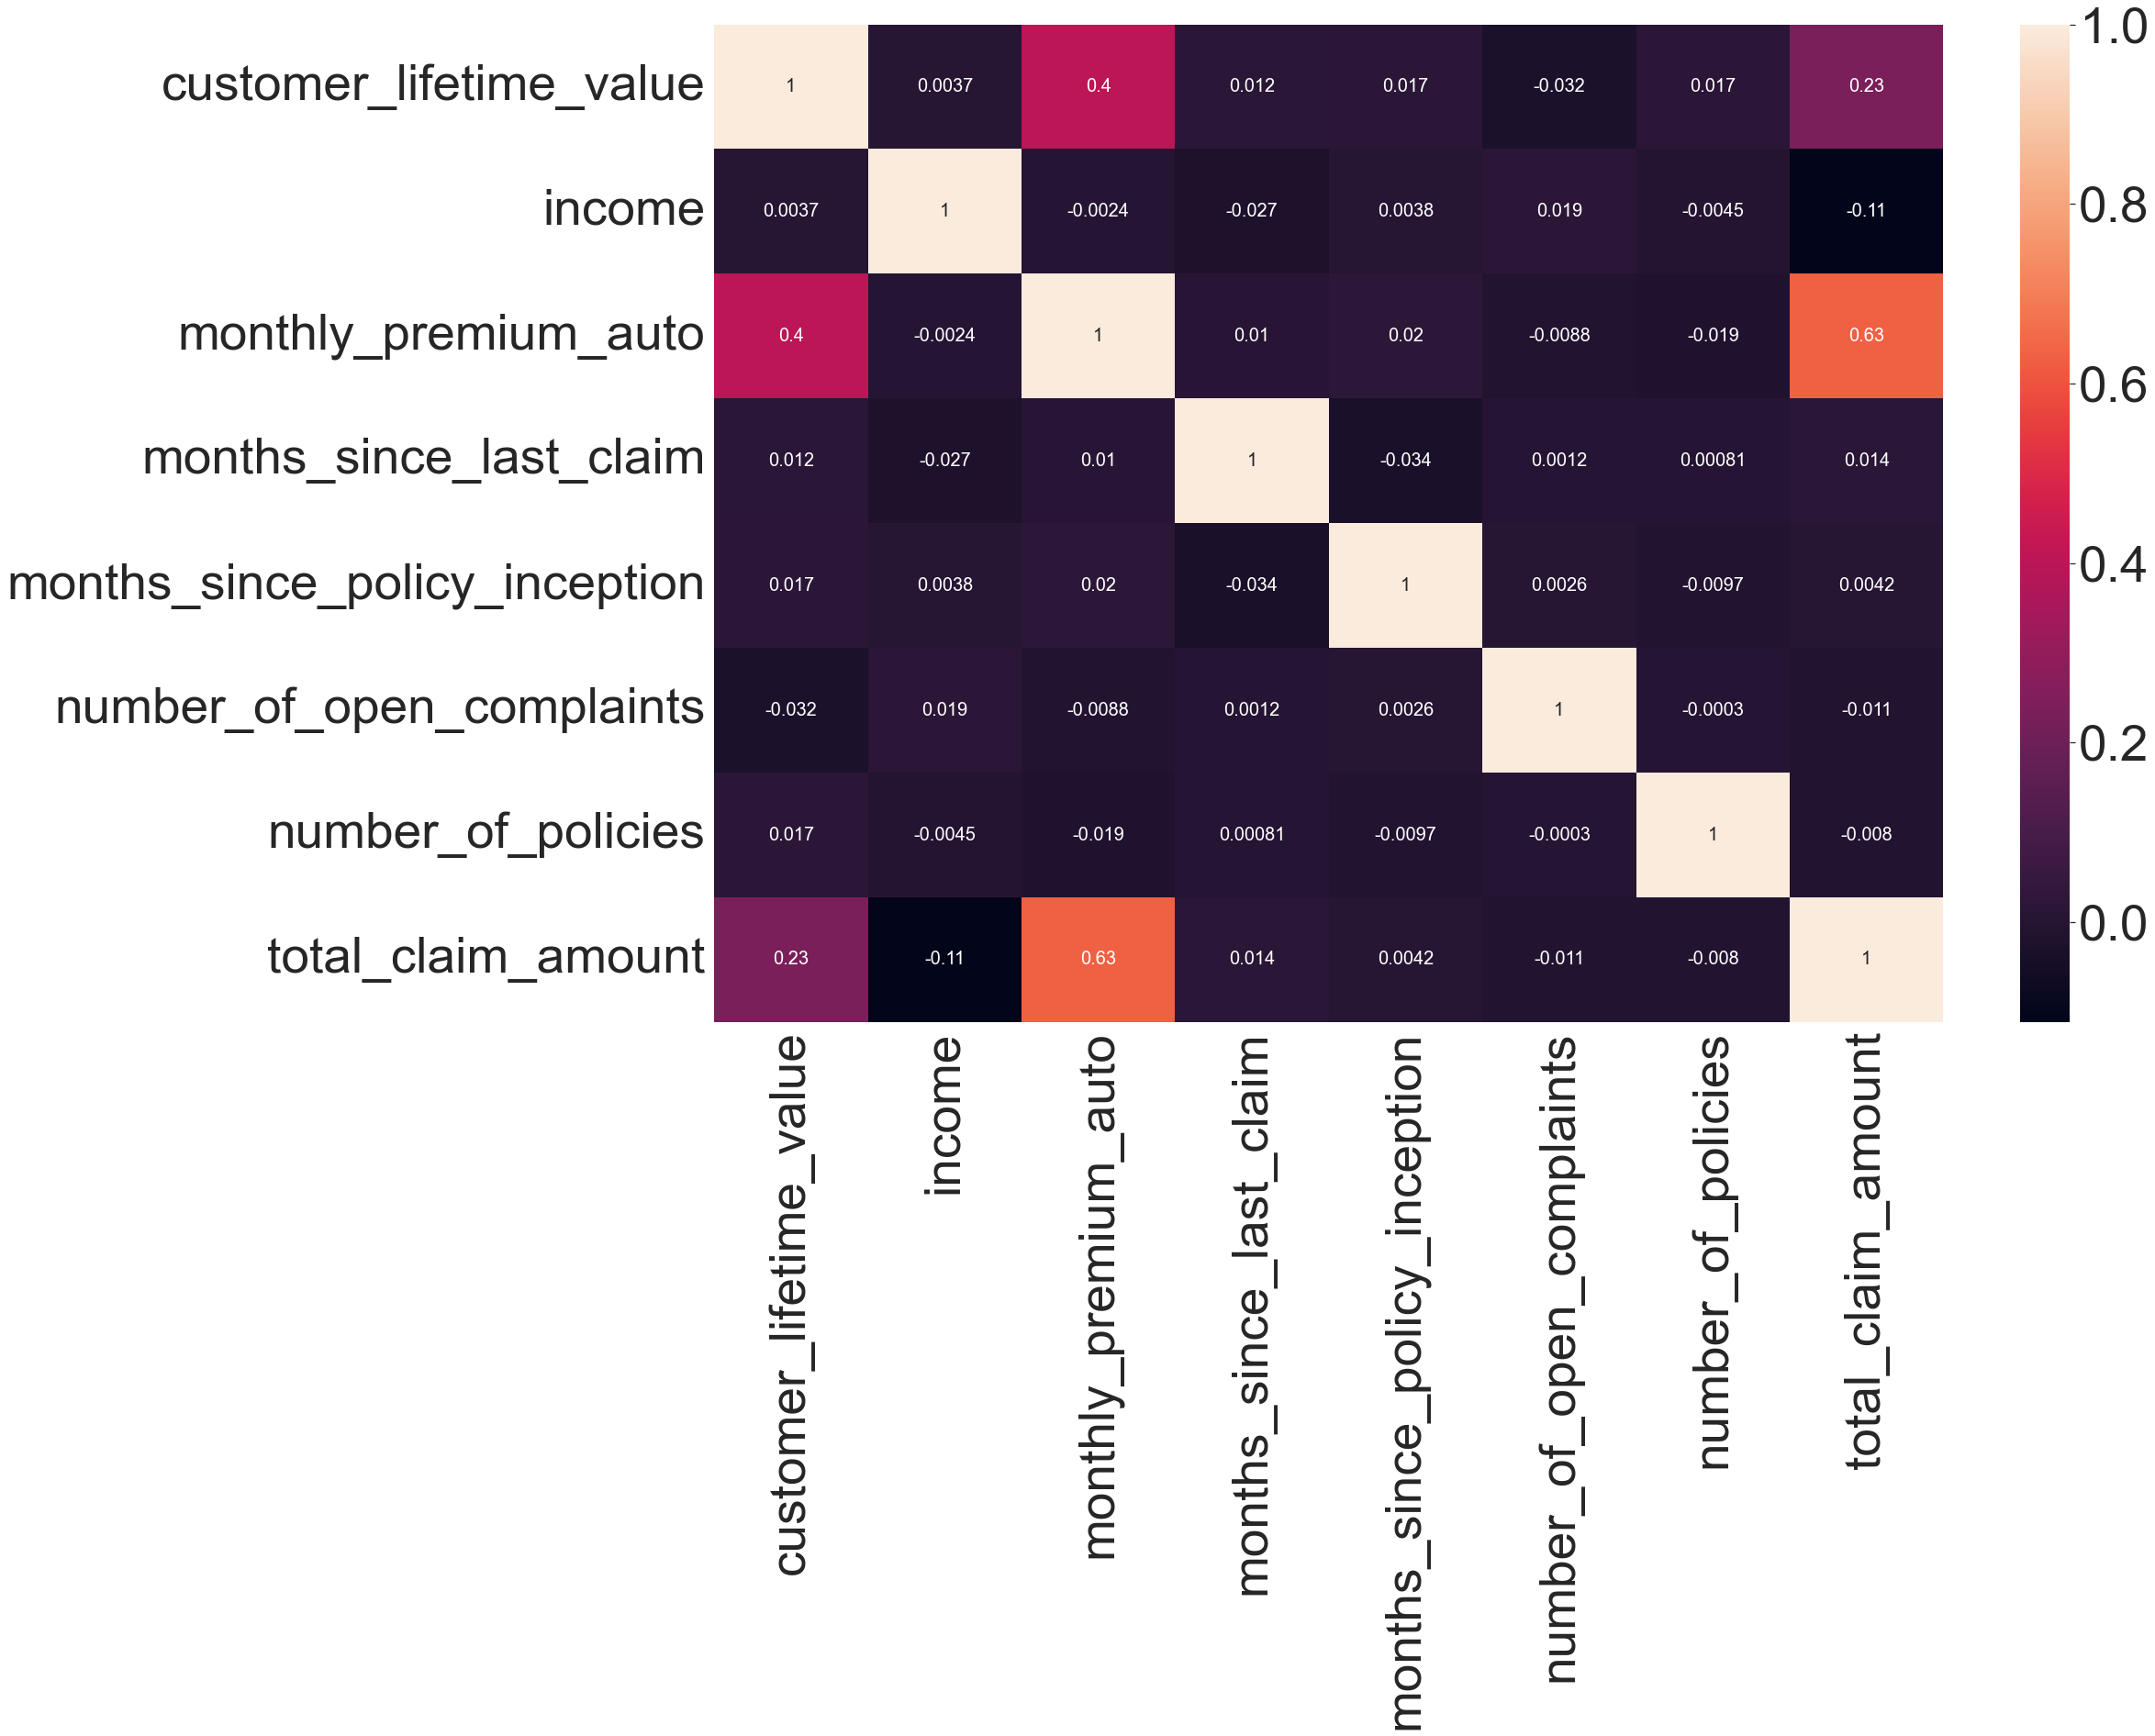

In [18]:
fig1=plt.figure(figsize=(30,20))
sns.heatmap(df_1.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=5)

In [19]:
df_cat= df_1.select_dtypes(include='object')
df_numerical = df_1.select_dtypes(include='int64')

# Labeling the region column

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for columns in df_cat:
    df_cat[columns]=label_encoder.fit_transform(df_cat[columns])

df=pd.concat([df_cat,df_numerical],axis=1) 
df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,0,0,1,40,0,1,1,1,1,...,0,1,4809,48029,61,7,52,0,9,292
1,3,0,0,1,9,1,4,0,1,2,...,0,1,2228,92260,64,3,26,0,1,744
2,1,0,0,0,32,0,1,1,1,2,...,4,1,14947,22139,100,34,31,0,2,480
3,2,1,1,1,2,1,1,1,1,2,...,0,1,22332,49078,97,10,3,0,2,484
4,2,0,2,0,8,1,2,0,1,1,...,0,1,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,10,1,4,0,1,1,...,1,1,15563,61541,253,12,40,0,7,1214
10685,2,0,0,1,27,1,1,0,2,1,...,0,1,5259,61146,65,7,68,0,6,273
10686,0,0,1,0,55,0,1,0,0,1,...,2,1,23893,39837,201,11,63,0,2,381
10687,3,0,2,1,35,0,1,0,2,0,...,4,1,11971,64195,158,0,27,4,6,618


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])
df['response']= label_encoder.fit_transform(df['response'])
df['coverage']= label_encoder.fit_transform(df['coverage'])
df['education']= label_encoder.fit_transform(df['education'])
df['month']= label_encoder.fit_transform(df['month'])
df['employment_status']= label_encoder.fit_transform(df['employment_status'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['policy_type']= label_encoder.fit_transform(df['policy_type'])
df['policy']= label_encoder.fit_transform(df['policy'])
df['renew_offer_type']= label_encoder.fit_transform(df['renew_offer_type'])
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['vehicle_class']= label_encoder.fit_transform(df['vehicle_class'])
df['effective_to_date']= label_encoder.fit_transform(df['effective_to_date'])
df['location_code']= label_encoder.fit_transform(df['location_code'])



  
df


Begin by visually examining distributions (histagrams) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.

    varA

    Use minmax transform to bring varA's values into the range [0,1].
    Check that varA has been rescaled using a distplot or a histagram


<AxesSubplot:xlabel='income', ylabel='Count'>

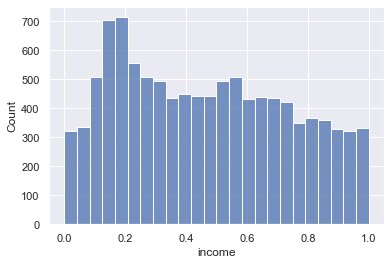

In [95]:
varA=df['income']
varB=df['customer_lifetime_value']

normalized_varA=(varA-varA.min())/(varA.max()-varA.min())
normalized_varA
sns.histplot(data=normalized_varA)


    varB

    Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
    Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


In [142]:
varB

0         4809
1         2228
2        14947
3        22332
4         9025
         ...  
10684    15563
10685     5259
10686    23893
10687    11971
10688     6857
Name: customer_lifetime_value, Length: 10689, dtype: int64

In [143]:
varB= np.array(varB.reset_index(drop=True))

In [147]:
varB

array([ 4809,  2228, 14947, ..., 23893, 11971,  6857], dtype=int64)

In [148]:

varB=varB.reshape(-1,1)


In [174]:
# box-cox

import numpy as np
from sklearn.preprocessing import power_transform
data = varB
a=power_transform(data, method='box-cox')

<AxesSubplot:ylabel='Count'>

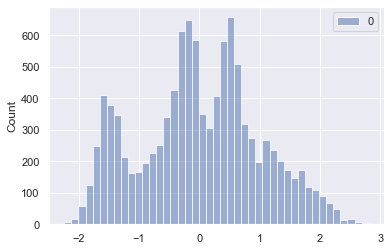

In [175]:
sns.histplot(data=a)


In [176]:
# yeo-johnson

import numpy as np
from sklearn.preprocessing import power_transform
data1 = varB
b=power_transform(data1, method='yeo-johnson')

<AxesSubplot:ylabel='Count'>

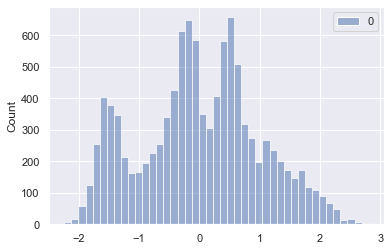

In [178]:
sns.histplot(data=b)